In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [5]:
# lets get some more data
# notice I've added the delimiter keyword argument, 
# if you don't include this numpy thinks everything is text
cluster = np.genfromtxt("m67_cleaned.txt", names=True, dtype=None, delimiter=',')

cluster.dtype

/Users/mbovill/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  after removing the cwd from sys.path.


dtype([('name', '<i8'), ('g', '<f8'), ('bprp', '<f8'), ('mem', 'S2')])

In [17]:
# I want to know what the cluster data looks like, lets split it up to useful bits
# we're going to create a boolean array based on a condition, in this case a flag
# we can select a subset of a np.array in this way

# setting up the mask
member_cut = cluster['mem'] == b' Y'
# selecting out the members (member_cut = True)
members = cluster[member_cut]
# selecting out the non members (member_cut = False)
non_members = cluster[~member_cut]

# lets see how many data points we have in each catagory
print(len(cluster), len(members), len(non_members))

13467 1096 12371


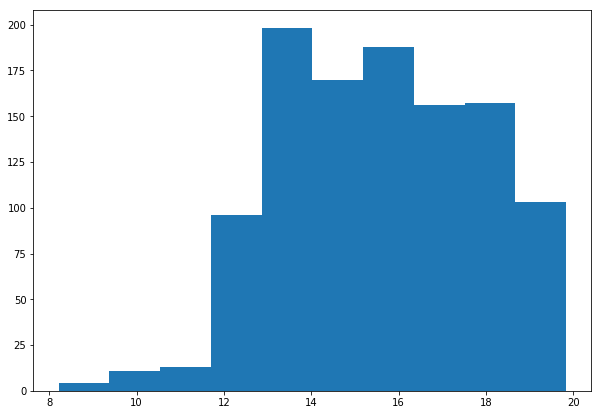

In [18]:
# now we can see what the data look like

fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(111)

ax.hist(members['g'])

plt.show()

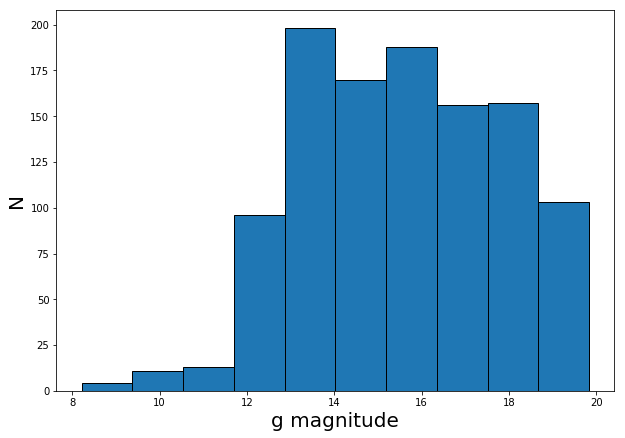

In [12]:
# that's not great...
# lets work on that.

fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(111)

### adding and edge color to the bins
ax.hist(members['g'], edgecolor='black')

ax.set_xlabel("g magnitude",size=20)
ax.set_ylabel("N",size=20)

plt.show()

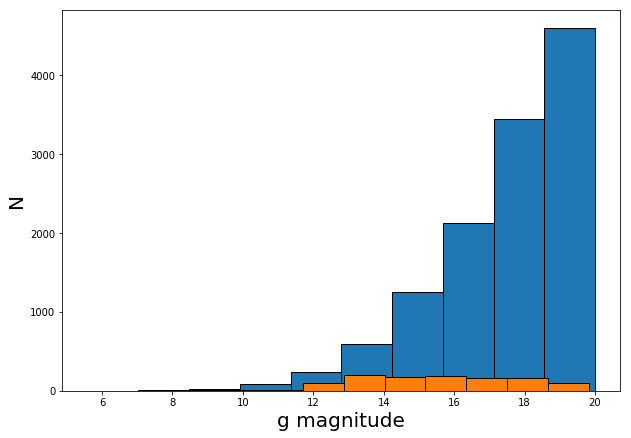

In [13]:
# cool. How does that compare to the non-members?

fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(111)

ax.hist(non_members['g'], edgecolor='black')
# plotting a second histogram
ax.hist(members['g'], edgecolor='black')


ax.set_xlabel("g magnitude",size=20)
ax.set_ylabel("N",size=20)

plt.show()

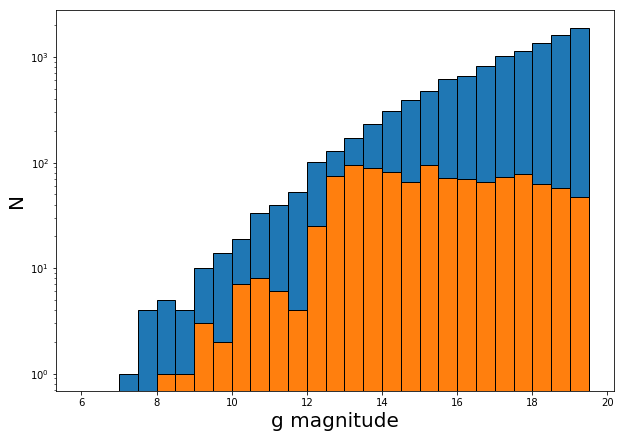

In [14]:
# hmm way more non-members, that's not ideal
# and the bins don't align at all! 
# How do we fix this?

fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(111)

# explicitly set bins
bins = np.arange(6, 20, 0.5)

# since we have a large range of values set the histogram values to log
ax.hist(non_members['g'], edgecolor='black', bins=bins, log=True)
ax.hist(members['g'], edgecolor='black', bins=bins, log=True)

ax.set_xlabel("g magnitude",size=20)
ax.set_ylabel("N",size=20)

plt.show()

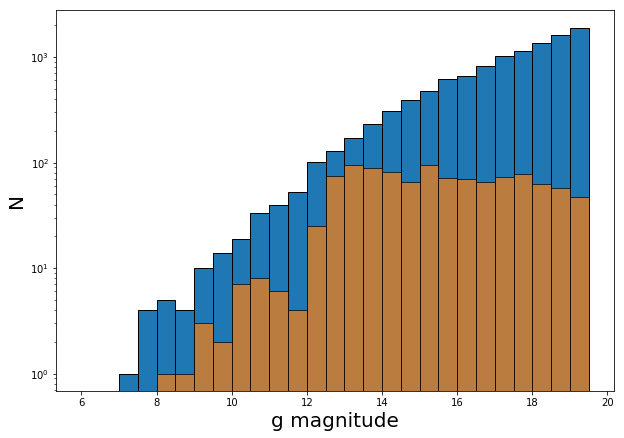

In [15]:
# much better, but we can still make it clearer

fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(111)

bins = np.arange(6, 20, 0.5)

# playing with the transparency of one of the histograms
ax.hist(non_members['g'], edgecolor='black', bins=bins, log=True)
ax.hist(members['g'], edgecolor='black', bins=bins, log=True, alpha=0.7)

ax.set_xlabel("g magnitude",size=20)
ax.set_ylabel("N",size=20)

plt.show()

In [ ]:
### Challenge 1: Redo this plot using only a line for the histogram rather than the bar plot. Select your own colors for the histogram.

In [ ]:
### Challenge 2: Let's say we want to compare the distributions of two populations but don't care as much about the normalization.
# Normalize both histograms and replot.